# 🎬 TMDB Movie Success Analysis
Using the TMDB movie dataset to explore what makes a movie successful with Pandas, Matplotlib, and Regression.

In [90]:
# 📦 Import Libraries
import pandas as pd # Data manipulation
import numpy as np
import matplotlib.pyplot as plt # Plotting library
import seaborn as sns # Data visualization
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Previous WS recap

Explain each function. 

Step	Code Section	Purpose
Understanding	N/A	Define the problem: predicting movie revenue
Data Collection	pd.read_csv()	Load TMDB dataset
Data Cleaning	.drop_duplicates(), .dropna()	Remove bad data
EDA	.describe(), sns.heatmap()	Find patterns & relationships
Build Model	LinearRegression().fit()	Train model to predict revenue
Evaluate Model	mean_absolute_error(), r2_score()	Assess model performance
Communicate Results	plt.scatter()	Explain results visually

In [91]:
# also recap the data science process, or explain it (put it on slides or something)
# THIS IS DATA COL

# 📥 Load Titanic Dataset (for exploratory analysis)
# Seaborn has datasets, similar to kaggle, we're using seaborn as you don't have to download them and they are small and lightweight
df = sns.load_dataset('titanic') # Load the Titanic dataset from seaborn
print(df.head()) # Load first 5 rows of df


# 📊 Get dataset overview
df.info() # Print summary info: column names, data types, non-null counts
df.describe() # Show summary statistics (mean, min, max, etc.)
df.isnull().sum() # Count the number of missing values per column

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

RECAP from last week OVER


Time to load in a new dataset, and create a project. we want to follow the data science process along the way

First step of data science process is understanding the problem 


- Our goal is to analyzing movie revenue using data from TMDB (the movie database)
- How do we do this? We have to 
1. import the necessary data, 
2. clean the data (for example by handling missing values and duplicates)
3. Explore the dataset to find patterns and relationships
4. Build models to predict or analyze movie revenue
5. Interpret results and gain insights from the data.

Key Questions to Consider:
✅ What factors influence a movie's revenue? (e.g., budget, genre, popularity, votes)
✅ Are there any missing or inconsistent values that need to be cleaned?
✅ How has movie revenue changed over time?
✅ Can we find correlations between budget and revenue?

explain what tmdb is: (data collection)
TMDB (The Movie Database) is a popular, community-driven online database for movies and TV shows. 
It provides detailed information about films, including cast, crew, budget, revenue, ratings, and more. TMDB offers a free API that allows developers to access its vast dataset for research, analysis, and application development.

In this case, we are using TMDB data to analyze movie revenue trends and explore what factors contribute to a film’s financial success. 

In [92]:
# 📥 Load TMDB Movies Dataset

# Types of Data Collected

# Structured Data (tables with rows and columns, e.g., CSV, Excel, SQL) etc

# we will use pandas functions to peek into the data - talk about at the start we will import pandas

# Data Collection
df = pd.read_csv('tmdb-movies.csv') # Load the dataset from a CSV file
df.head() # Display the first 5 rows, a lot more than the titanic csv file

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Data collection continued

In [ ]:
# 📝 Check dataset information
print(df.head())

print(df.info()) # Print column names, data types, and non-null counts
print(df.describe()) # Show statistical summaries (e.g., mean, std, min, max)
print(df.isnull().sum()) # tells you that there are no missing id's, there are 76 movies with missing casts, 44 movies with missing directors etc

# some other cool things - data analysis before we clean it
# lets look at some of the data we collected (little bit of data analysis)

print(df.duplicated().sum()) # only 1 duplicated rows

print(f"Duplicate rows: {df.duplicated().sum()}") # duplicate rows

df['genres'].value_counts().head() # index the column, 
#value_counts is a pandas function that counts the number of unique values in a column, head gets the 10 most popular

# but since we later want to analyse the revenue for each movie, here's how to get the highest revenue generating movies
# first show the sort_values function with the 'by' parameter, then add the indexing (filtering)
print(df.sort_values(by='revenue', ascending=False))


# that doesnt give us any useful information as we can't see the titles, so lets filter the columns to see the title and revenue
print(df[['original_title', 'revenue']].sort_values(by='revenue', ascending=False).head(10))

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

Need to explain + understand:
- dropna, subset, inplace
- df[df]

## 🧹 Data Cleaning - explain

We saw that from the data collection phase, there were missing values and duplicate rows. 
We don't want that, so we have to clean our data

In [ ]:
# 🔍 Data Cleaning: Removing duplicates and handling missing values

# inplace=True means that original DataFrame is modified directly without needing to assign the result to a new variable.
df.drop_duplicates(inplace=True) # Remove duplicate rows


print(df.isnull().sum())
# show that right now, columns with missing imdb_id = 4

#The dropna() function is used here to drop rows where specific columns ('budget_adj', 'revenue_adj', and 'release_year') have missing (NaN) values. 
# dropna means drop not available
df.dropna(subset=['budget_adj', 'revenue_adj', 'release_year', 'imdb_id' ], inplace=True) # Drop rows with missing critical values

print(df.isnull().sum())
# after, columns with missing imdb_id = 0, meaning these rows are removed from the df

# 🎯 Feature Engineering: Creating a new profit column
df['profit_adj'] = df['revenue_adj'] - df['budget_adj'] # Compute adjusted profit

print(df) # 22 columns now
print(df['profit_adj'])
#print(df.head())

# 🗑️ Removing unrealistic data (Zero budget or revenue movies)
print(df['budget_adj'] > 0) # outputs are boolean values

#If the value in the budget_adj column is greater than 0, it will be True, meaning the row will be kept.

df = df[df['budget_adj'] > 0]   # Keep only movies with a nonzero budget inside will be a boolean value
# This filters the DataFrame to only include rows where the revenue_adj column is greater than 0.

df = df[df['revenue_adj'] > 0]  # Keep only movies with a nonzero revenue

# 📈 Display the cleaned dataset
# now we have filtered unncessary / empty rows, created a new column and cleaned the data
df.head()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                2425
director                   1
tagline                  278
keywords                 137
overview                   0
runtime                    0
genres                     0
production_companies      44
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
profit_adj                 0
dtype: int64
id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                2425
director                   1
tagline                  278
keywords                 137
overview                   0
r

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


## 📊 Exploratory Data Analysis 

Now we have cleaned the data, we can analyse and summarise the data we received from the datasets
It helps detect patterns, relationships, and anomalies in the data.

In [104]:
# 🏆 Top 10 Most Profitable Movies (explain each function), explain each part separately
# again talk about the sort_values function
df[['original_title', 'profit_adj']].sort_values(by='profit_adj', ascending=False).head(10)

,original_title,profit_adj
1329,Star Wars,2.750137e+09
1386,Avatar,2.586237e+09
5231,Titanic,2.234714e+09
10594,The Exorcist,2.128036e+09
9806,Jaws,1.878643e+09
8889,E.T. the Extra-Terrestrial,1.767968e+09
3,Star Wars: The Force Awakens,1.718723e+09
8094,The Net,1.551568e+09
10110,One Hundred and One Dalmatians,1.545635e+09
7309,The Empire Strikes Back,1.376998e+09


           id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10822     396  tt0061184    0.670274    7500000    33736689   
10828    5780  tt0061107    0.402730    3000000    13000000   
10829    6644  tt0061619    0.395668    4653000     6000000   
10835    5923  tt0060934    0.299911   12000000    20000000   
10848    2161  tt0060397    0.207257    5115000    12000000   

                        original_title  \
0                       Jurassic World   
1                   Mad Max: Fury Road   
2                            Insurgent   
3         Star Wars: The Force Awakens   
4                            Furi

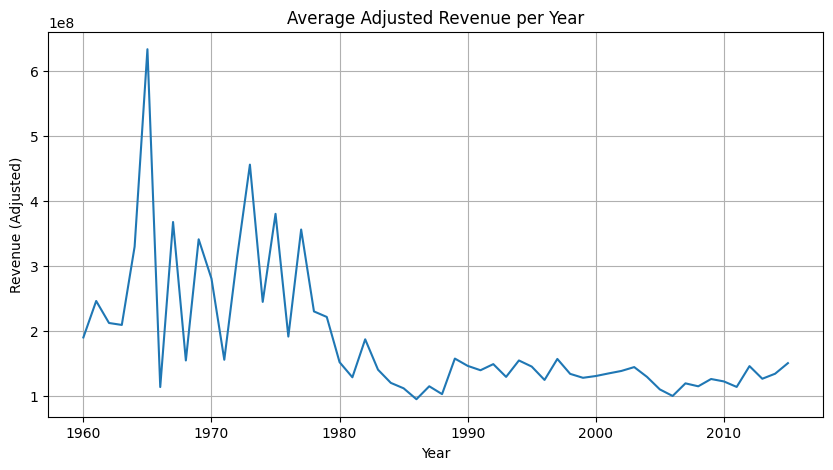

In [121]:
# Revenue by year

# Group the DataFrame by 'release_year' and calculate the mean of 'revenue_adj' for each year
print(df.groupby('release_year').head()) # # scroll down to release year column and see that all movies are grouped by their release year
# print(df.groupby('release_year'))
print(df.groupby('release_year')['revenue_adj'].mean())


df.groupby('release_year')['revenue_adj'].mean().plot(figsize=(10,5))

# df.groupby('release_year'):

# This groups the DataFrame df by the unique values in the release_year column. This means that all rows with the same release_year are grouped together.

# ['revenue_adj']:

# After grouping by year, we are selecting the revenue_adj column to focus on the revenue data (adjusted for inflation or other factors).

# .mean():

# This computes the mean (average) of the revenue_adj column for each group (i.e., each release year). This gives the average adjusted revenue for each year.

# .plot(figsize=(10,5)):

# This plots the result of the mean() computation (the average adjusted revenue per year).

# figsize=(10,5) specifies the size of the plot, where 10 is the width and 5 is the height, in inches.


plt.title('Average Adjusted Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Revenue (Adjusted)')
plt.grid(True)
plt.show()

## 📊 Exploratory Data Analysis - explain

High correlation:

1. Revenue (revenue_adj) & Profit (profit_adj): 0.98

Almost a perfect correlation. This makes sense because profit = revenue - budget.

If revenue increases, profit also increases proportionally



2. Vote Count (vote_count) & Popularity (popularity): 0.78

Movies with a higher vote count tend to be more popular.

This suggests that audience engagement (more votes) is strongly linked with how well-known a movie is.

3. Revenue (revenue_adj) & Vote Count (vote_count): 0.65

Higher revenue movies tend to have more votes.

This indicates that big-budget, successful movies receive more audience engagement.


Low correlation:

1. Budget (budget_adj) & Vote Average (vote_average): 0.036

Almost no correlation.

This means spending more money does not guarantee higher ratings.

Some high-budget movies get bad ratings, and some low-budget films get high ratings.

2. Revenue (revenue_adj) & Vote Average (vote_average): 0.27

A weak positive correlation.

Successful movies don’t always have the highest ratings.


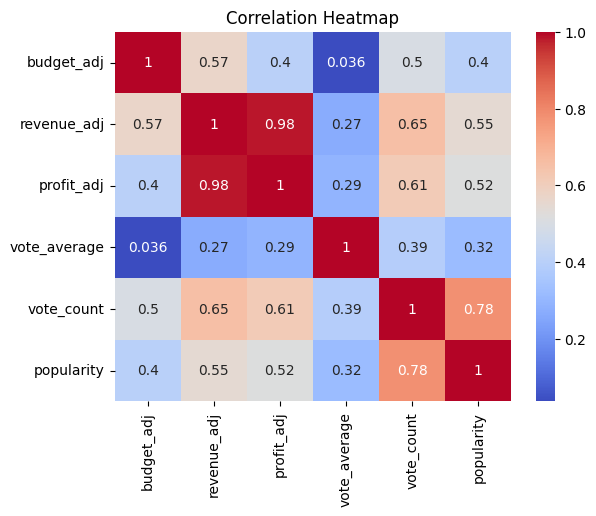

In [ ]:
# Correlation heatmap - Still in EDA
# What is a correlation heatmap - explain

# Compute correlation matrix
# explain confusion matrix

# correlation map shows how much 1 variable (or 1 column) is related to another using the numbers in the dataset
# helps to identify patterns and relationships between variables
corr = df[['budget_adj', 'revenue_adj', 'profit_adj', 'vote_average', 'vote_count', 'popularity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Analysis:

# Revenue (revenue_adj) & Profit (profit_adj): 0.98

# Almost a perfect correlation. This makes sense because profit = revenue - budget.

# If revenue increases, profit also increases proportionally

Alex can explain this bit: Uses pearson's correlation coefficient to calculate (measures how strongly related two variables are)
Value from -1 to 1, basically how well values align with a straight line.

How pearson's is caculated:
1. Find how far each value is from its mean
- how above or below average each number is??

2. Multiply those distances together for each row

3. Divide that by how “spread out” the two columns are (this is called standard deviation)


But now you ask what if the relationship wasn't linear? Its a great question because a lot of the time irl data is not gonna be proportionate to eachother,

well the answer is quite simple but to understand it would be probably getting off topic on what we need to do today but basically as pearson's correlation coefficient is merely a method we use to model linear relationships we simply need to use another method to model non-linear relationships


Spearman
SACK!!!!!!!!!
Research in own time if you're curious
Use when: you think one goes up as the other goes up — but not in a straight line
It asks: “When one goes up, does the other also go up — in general?”

Higher popularity → generally more revenue, but not perfectly steady
Use it when the pattern curves but still goes in one direction overall.

## 🤖 Predicting Revenue with Linear Regression
Suppose we wish to find out based on our data of budget_adj, popularity, vote_average, how much that will influence the revenue adj.
Suppose we have data for a new movie on budget_adj, popularity, vote_average and we want to predict the new movie's revenue adj.

it’s called Multivariate Linear Regression, but the algorithm is still "linear"

📌 So what does "linear" mean in this context?
It means the model tries to fit a straight-line relationship between the inputs (features) and the output (target) — no matter how many features you use.

One feature → simple line
Two features → regression plane (3D)
Three+ features → regression hyperplane (4D, 5D...)
And LinearRegression() fits that line/plane/hyperplane — it scales automatically!

In [ ]:
# Prepare data
X = df[['budget_adj', 'popularity', 'vote_average']]
y = df['revenue_adj']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Why do we split training and test data?
# We split the training into 80% training and 20% testing to see how well it does on new/unseen data

# Train model
model = LinearRegression()
model.fit(X_train, y_train) # learn relationship between features and the label
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
# What does each of these factors tell us
# coefficient of determination (pearson squared)
print('R-squared:', r2_score(y_test, y_pred)) 
# How much of the variation in Y (dependent var) is explained by X (independent var)
# i.e 70% of the difference in movie revenues can be explained by budget and popularity.
# # The remaining 30% is due to other stuff your model doesn’t account for — like cast, marketing, release timing, etc.
print('RMSE:', mean_squared_error(y_test, y_pred))
# Root Mean Squared Error - how far off the what predictions are, on average (measured in the same units as Y)
# So here we're looking for a better number
# Calculated by taking the square root of the average of the squared differences between predicted and actual values

In [ ]:
# Plot predictions vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Revenue (Adjusted)')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.grid(True)
plt.plot(np.arange(0, 2.5*10**9, 10000), np.arange(0, 2.5*10**9, 10000))
plt.show()

Why did we use 3 features instead of just 1?
Real world outcomes are influenced by multiple factors.

Revenue is not just about how much money you put into a movie. Think about it:
Budget – Bigger budgets often mean better production quality & marketing
Popularity – Reflects public interest, buzz, or hype
Vote average – Reflects how well audiences actually liked the movie

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

features = ['budget_adj', 'popularity']
X = df[features]
y = df['revenue_adj']
model = LinearRegression()
model.fit(X, y)

x_range = np.linspace(X['budget_adj'].min(), X['budget_adj'].max(), 30)
y_range = np.linspace(X['popularity'].min(), X['popularity'].max(), 30)
x_surf, y_surf = np.meshgrid(x_range, y_range)
z_pred = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

scatter = go.Scatter3d(
    x=X['budget_adj'],
    y=X['popularity'],
    z=y,
    mode='markers',
    marker=dict(size=3, color='blue'),
    name='Actual Data'
)

surface = go.Surface(
    x=x_surf,
    y=y_surf,
    z=z_pred,
    colorscale='Viridis',
    opacity=0.5,
    name='Regression Plane'
)

layout = go.Layout(
    title='Interactive 3D Regression: Budget vs Popularity vs Revenue',
    scene=dict(
        xaxis_title='Budget (Adjusted)',
        yaxis_title='Popularity',
        zaxis_title='Revenue (Adjusted)'
    ),
    width=800,
    height=600
)

fig = go.Figure(data=[scatter, surface], layout=layout)
fig.show()